#### ifで見る機械学習

- 機械学習で実現したいこと　＝　「データの集合をもとに、自動的にデータに潜む法則性を学習・発見し、データを分類、判別すること」

- 人の情報処理能力を超えるような、複雑なデータを自動で分類したり判別するということが、機械学習のメリット

- 機械学習ではなく、if文の組み合わせ（「ルールベース」といいます）でも十分なケースが多々ある

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/data.csv')

In [2]:
df.head()

,weight,y
0,79.6,False
1,85.1,False
2,92.5,True
3,78.5,False
4,93.3,True


In [3]:
def should_re_exam(weight):
    """ 再検査対象の人はTrue """
    if weight > 90:
        return True
    else:
        return False

In [4]:
for row in df.itertuples():
    print(should_re_exam(row.weight), row.y)

False False
False False
True True
False False
True True
False False
False False
False False
False False
True True


#### しきい値を見つける

- グループ分けの基準となる値
- 人の判断でしきい値を見定めた場合、if分岐で以下のように分類できる

In [5]:
df = pd.read_csv('./dataset/data2.csv')

In [6]:
df

,x,y
0,90,1
1,60,0
2,80,1
3,70,0


In [7]:
# しきい値は 75？
def should_re_exam(weight):
    if weight > 75:
        return True
    else:
        return False

In [8]:
for row in df.itertuples():
    print(should_re_exam(row.x), row.y)

True 1
False 0
True 1
False 0


#### 可視化してしきい値を見つける

- 100件のレコードがあるデータセット
- 目視での判断が難しいので、プロットして図で見る

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./dataset/data3.csv')

In [11]:
df.head(3)

,x,y
0,1.852906,0
1,0.354823,0
2,3.589747,1


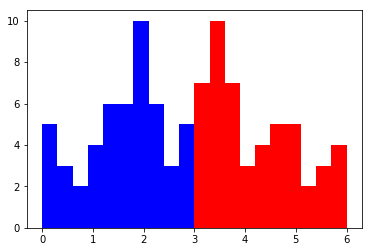

In [12]:
# プロットしてしきい値を見定める
plt.hist(df[df["y"] == 0]["x"],
        bins=20, range=(0, 6), color='blue')
plt.hist(df[df["y"] == 1]["x"],
        bins=20, range=(0, 6), color='red');

In [13]:
# 分類用の関数
def is_one(num):
    if num > 3:
        return True
    else:
        return False

In [14]:
answers = []
for row in df.itertuples():
    answer = is_one(row.x)
    answers.append(answer)

In [15]:
# yに1が入っている数が、元のdfとanswersで同じになっているかチェック
(answers == df['y']).sum() / len(answers)

1.0

#### しきい値が決められないデータを扱う

- データの数が200件超
- 中学生男女の身長のデータ

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./dataset/jh_heights.csv')

In [36]:
df.head(10)

,x,y
0,146,0
1,147,0
2,148,0
3,148,0
4,149,0
5,149,0
6,150,0
7,150,0
8,150,0
9,151,0


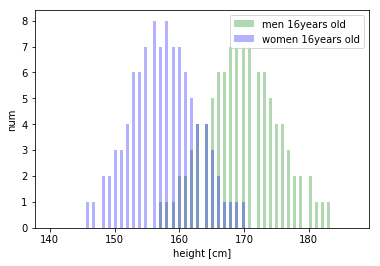

In [37]:
plt.hist(df[df["y"] == 1]["x"], label="men 16years old", bins=100,
         range=(140, 187), alpha=0.3, color="green")
plt.hist(df[df["y"] == 0]["x"], label="women 16years old", bins=100,
         range=(140, 187), alpha=0.3, color = "blue")
plt.xlabel("height [cm]")
plt.ylabel("num")
plt.legend();

In [38]:
def is_man(height):
    if height > 171:
        return True
    else:
        return False

In [39]:
answers = []
for row in df.itertuples():
    answer = is_man(row.x)
    answers.append(answer)

In [41]:
#　しきい値が見分けにくくなったので、精度が落ちた
(answers == df['y']).sum() / len(answers)

0.68500000000000005

#### 2次元データから分類

- 身長だけではなく、体重のデータも追加して分類する

In [42]:
df = pd.read_csv('./dataset/jh_heights_weight.csv')

In [43]:
df.head(10)

,Height,Weight,y
0,146,51,0
1,147,53,0
2,148,55,0
3,148,50,0
4,149,44,0
5,149,52,0
6,150,56,0
7,150,52,0
8,150,53,0
9,151,48,0


In [45]:
# 身長が163cmより高く、体重が60kg未満なら、男性と判断
def is_man(height, weight):
    if height > 163 and weight < 60:
        return True
    else:
        return False

In [48]:
answers = []

for row in df.itertuples():
    y = is_man(row.Height, row.Weight)
    answers.append(y)

In [49]:
num_correct = (df['y'] == answers).sum()
num_correct

175

In [51]:
# 身長だけを参考にしていた時より、大幅に予想精度が改善
num_correct / len(df)

0.875

#### 2次元データの可視化

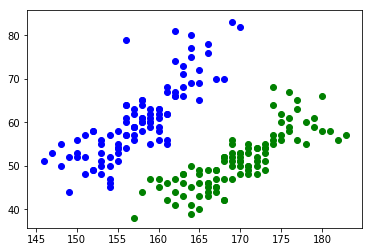

In [52]:
men = df[df["y"] == 1]
women = df[df["y"] == 0]

plt.scatter(men['Height'], men['Weight'], color='green')
plt.scatter(women['Height'], women['Weight'], color='blue');

#### 一次方程式による分類

In [53]:
a = 60 / 190

In [54]:
def is_man(height, weight):
    if weight < a * height:
        return True
    else:
        return False

In [56]:
answers = []
for row in df.itertuples():
    answers.append(is_man(row.Height, row.Weight))

In [57]:
num_corrects = (df['y'] == answers).sum()

In [58]:
num_corrects

168

In [59]:
num_corrects / len(df)

0.83999999999999997

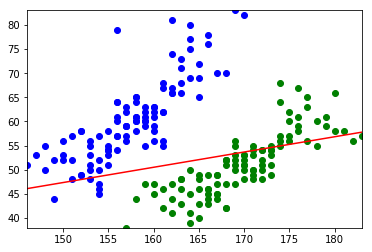

In [61]:
men = df[df["y"] == 1]
women = df[df["y"] == 0]

plt.scatter(men['Height'], men['Weight'], color='green')
plt.scatter(women['Height'], women['Weight'], color='blue')

plt.plot((0, 190), (0, 60), color="red")
plt.xlim(df['Height'].min(), df['Height'].max())
plt.ylim(df['Weight'].min(), df['Weight'].max());

#### 一次方程式による分類（２）

y = ax + b

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/jh_heights_weight.csv')

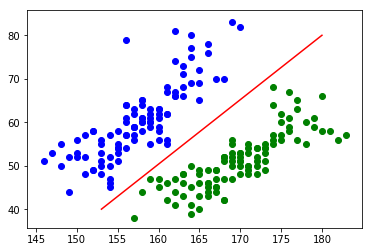

In [7]:
men = df[df["y"] == 1]
women = df[df["y"] == 0]

plt.scatter(men['Height'], men['Weight'], color='green')
plt.scatter(women['Height'], women['Weight'], color='blue')

plt.plot((153, 180), (40, 80), color="red");

In [8]:
a = (80 - 40) / (180 - 153)
b = 40 - 153 * a

def is_man(height, weight):
    if weight < a * height + b:
        return True
    else:
        return False

In [9]:
answers = []
for row in df.itertuples():
    answers.append(is_man(row.Height, row.Weight))

In [10]:
num_corrects = (df['y'] == answers).sum()

In [11]:
num_corrects

200

In [12]:
num_corrects / len(df)

1.0

#### scikit-learnとは

- Pythonのオープンソース機械学習ライブラリ
- 主に6つのカテゴリがある
    - 前処理
    - 分類
    - 回帰
    - クラスタリング
    - 次元削減
    - モデル選択

In [13]:
# scikit-learnとは
import sklearn
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [14]:
# scikit-learnに用意されている色々なデータセット
import sklearn.datasets
[s for s in dir(sklearn.datasets) if s.startswith('load_')]

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_lfw_pairs',
 'load_lfw_people',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files']

In [16]:
# データセットの説明は、DESCRで見る
dataset = sklearn.datasets.load_iris()
print(dataset['DESCR'][:213])  # 説明を途中まで表示

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the clas
